<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/UTS/Regression_Model_Decision_Tree_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/RegresiUTSTelkom.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [4]:
target_column = '2.26327'
X = df.drop(columns=[target_column])
y = df[target_column]

numerical_cols = X.columns.tolist()

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
top_features = mi_series.head(10).index.tolist()

X = X[top_features]


In [6]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
])

# Fit dan transform
X_processed = preprocessor.fit_transform(X)

# Konversi jika sparse matrix
if hasattr(X_processed, "toarray"):
    X_processed = X_processed.toarray()

print("Shape hasil Feature Engineering:", X_processed.shape)

Shape hasil Feature Engineering: (515344, 10)


=== Decision Tree Regressor ===
RMSE: 18.10677651388926
MSE: 327.8553557239316
MAE: 11.881925144381672
R² Score: 0.32679102619642164


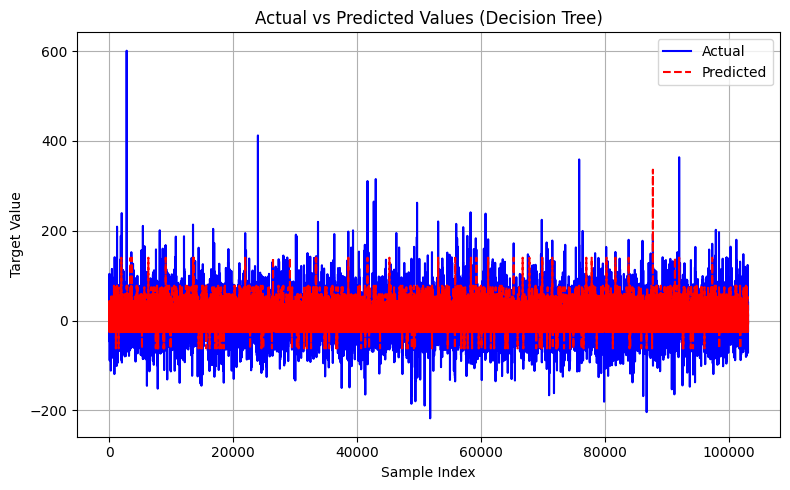

In [10]:
# Model Decision Tree
tree = DecisionTreeRegressor(random_state=42, max_depth=5)
tree.fit(X_train_scaled, y_train)

# Prediksi
y_pred_tree = tree.predict(X_test_scaled)

# Evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)

print("=== Decision Tree Regressor ===")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_tree, label='Predicted', color='red', linestyle='--')
plt.title("Actual vs Predicted Values (Decision Tree)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Decision Tree adalah model regresi yang menggunakan struktur pohon untuk memetakkan input(fitur) ke output(target).

**RMSE**: Rata-rata kesalahan prediksi sekitar 18 unit, sensitif terhadap outlier.

**MSE**: Kesalahan kuadrat rata-rata, makin kecil makin baik, tapi sulit dibaca karena satuannya kuadrat.

**MAE**: Rata-rata kesalahan absolut, lebih mudah dipahami dan tidak sensitif terhadap outlier.

**R²**: Model hanya menjelaskan 32.7% variasi data, artinya performa masih bisa ditingkatkan.

> Matriks terbaik yaitu R^2 untuk menilai seberapa baik model menjelaskan data secara keseluruhan, matriks MAE untuk melihat rata-rata error aktual tanpa penalti outlier, dan RMSE untuk memberikan penalti besar untuk prediksi yang tidak akurat.

> Model Decision Tree memiliki nilai R^2 =0.326 yang artinya model belum terlalu baik, masih ada ruang perbaikan.